# Credit Card Fraud Detection

## **Overview:**

In this notebook I will try to predict fraud transactions from a given data set. Given that the data is imbalanced, standard metrics for evaluating classification algorithm (such as accuracy) are invalid. I will focus on the following metrics: Sensitivity (true positive rate) and Specificity (true negative rate). Of course, they are dependent on each other, so we want to find optimal trade-off between them. Such trade-off usually depends on the application of the algorithm, and in case of fraud detection I would prefer to see high sensitivity (e.g. given that a transaction is fraud, I want to be able to detect it with high probability).

**By Sneha Ghosh**

**Data Science Intern**

**CodSoft July batch**

### **Importing Libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


##**Reading the dataset**

In [12]:
df=pd.read_csv("/content/creditcard[1].csv")


In [13]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255477,157249.0,2.071461,0.060467,-1.796866,0.396267,0.397019,-0.812514,0.125288,-0.172778,0.652199,...,-0.381820,-1.057455,0.325926,0.352463,-0.273028,0.183866,-0.070660,-0.032893,8.93,0.0
255478,157249.0,-2.843548,-4.587778,0.818595,0.203997,4.177982,-2.484075,-3.123154,0.380996,-0.710725,...,-0.127588,-1.119557,1.192799,0.008392,-1.345231,0.253538,0.094165,0.352329,27.48,0.0
255479,157249.0,1.294649,1.221781,-2.361473,1.635577,1.159360,-0.780776,0.277586,-0.995896,-0.430455,...,0.890610,0.238838,-0.151908,-0.758297,0.388915,-0.319750,0.190831,0.176565,22.24,0.0
255480,157250.0,2.287623,-1.360279,-0.859147,-1.805292,-0.916506,0.196297,-1.352885,0.007933,-1.461890,...,-0.113544,0.224519,0.227297,0.233038,-0.203433,-0.199558,0.030439,-0.051695,6.00,0.0


##**EDA**

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [15]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
255477,157249.0,2.071461,0.060467,-1.796866,0.396267,0.397019,-0.812514,0.125288,-0.172778,0.652199,...,-0.381820,-1.057455,0.325926,0.352463,-0.273028,0.183866,-0.070660,-0.032893,8.93,0.0
255478,157249.0,-2.843548,-4.587778,0.818595,0.203997,4.177982,-2.484075,-3.123154,0.380996,-0.710725,...,-0.127588,-1.119557,1.192799,0.008392,-1.345231,0.253538,0.094165,0.352329,27.48,0.0
255479,157249.0,1.294649,1.221781,-2.361473,1.635577,1.159360,-0.780776,0.277586,-0.995896,-0.430455,...,0.890610,0.238838,-0.151908,-0.758297,0.388915,-0.319750,0.190831,0.176565,22.24,0.0
255480,157250.0,2.287623,-1.360279,-0.859147,-1.805292,-0.916506,0.196297,-1.352885,0.007933,-1.461890,...,-0.113544,0.224519,0.227297,0.233038,-0.203433,-0.199558,0.030439,-0.051695,6.00,0.0
255481,157250.0,0.225431,0.537650,-0.841347,-1.015495,1.310253,-0.800218,1.459744,-0.371294,0.023430,...,0.004810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(9965, 31)

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9965.000000,9965.000000,9965.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,...,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5934.484897,-0.241681,0.280693,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,...,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4449.407112,1.522695,1.308882,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,...,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.012157,-0.208591,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,...,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4547.000000,-0.372624,0.286179,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,...,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10163.000000,1.151506,0.900823,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,...,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [14]:

df.isnull().values.any()

True

In [16]:
df.fillna(df.mean(), inplace=True)

In [17]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
255477,157249.0,2.071461,0.060467,-1.796866,0.396267,0.397019,-0.812514,0.125288,-0.172778,0.652199,...,-0.381820,-1.057455,0.325926,0.352463,-0.273028,0.183866,-0.070660,-0.032893,8.930000,0.000000
255478,157249.0,-2.843548,-4.587778,0.818595,0.203997,4.177982,-2.484075,-3.123154,0.380996,-0.710725,...,-0.127588,-1.119557,1.192799,0.008392,-1.345231,0.253538,0.094165,0.352329,27.480000,0.000000
255479,157249.0,1.294649,1.221781,-2.361473,1.635577,1.159360,-0.780776,0.277586,-0.995896,-0.430455,...,0.890610,0.238838,-0.151908,-0.758297,0.388915,-0.319750,0.190831,0.176565,22.240000,0.000000
255480,157250.0,2.287623,-1.360279,-0.859147,-1.805292,-0.916506,0.196297,-1.352885,0.007933,-1.461890,...,-0.113544,0.224519,0.227297,0.233038,-0.203433,-0.199558,0.030439,-0.051695,6.000000,0.000000
255481,157250.0,0.225431,0.537650,-0.841347,-1.015495,1.310253,-0.800218,1.459744,-0.371294,0.023430,...,0.004810,-0.008824,-0.004946,0.001003,0.017323,0.001137,-0.000646,0.000721,90.493516,0.001836


In [18]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

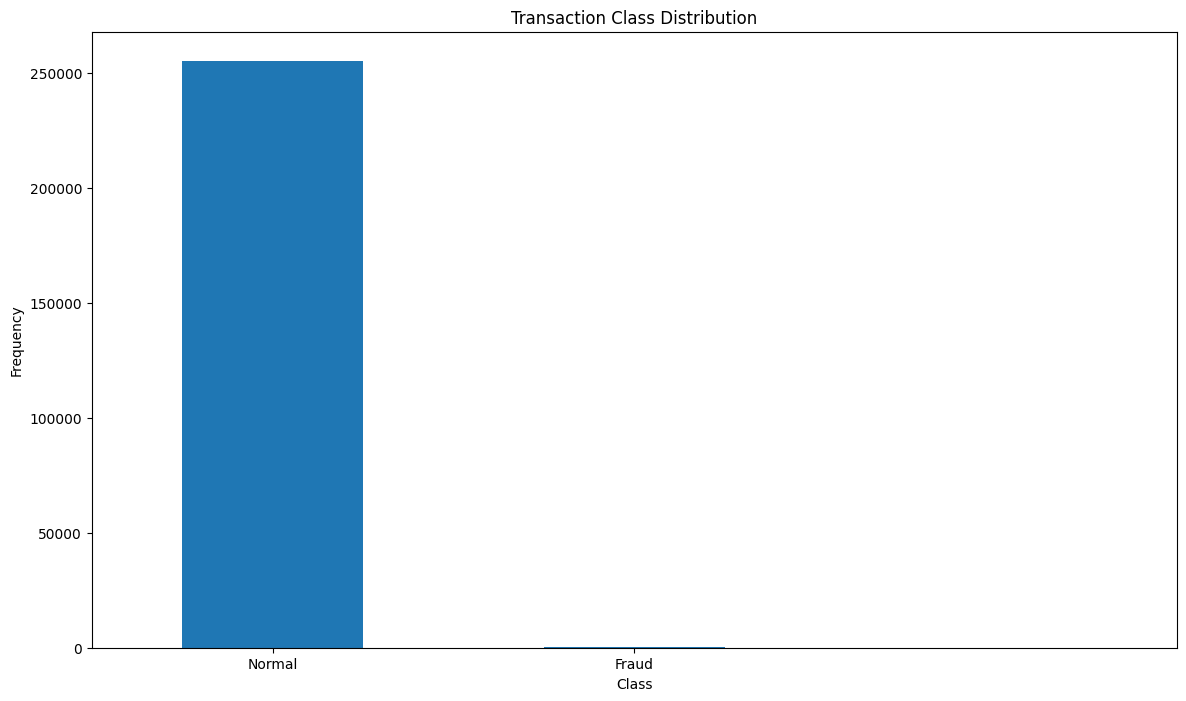

In [22]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [24]:
## Get the Fraud and the normal dataset

fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [25]:
print(fraud.shape,normal.shape)

(469, 31) (255012, 31)


In [26]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     469.000000
mean      122.896247
std       260.410550
min         0.000000
25%         1.000000
50%         8.900000
75%       104.810000
max      2125.870000
Name: Amount, dtype: float64

In [27]:
normal.Amount.describe()

count    255012.000000
mean         90.433923
std         250.914576
min           0.000000
25%           6.000000
50%          23.000000
75%          79.450000
max       19656.530000
Name: Amount, dtype: float64

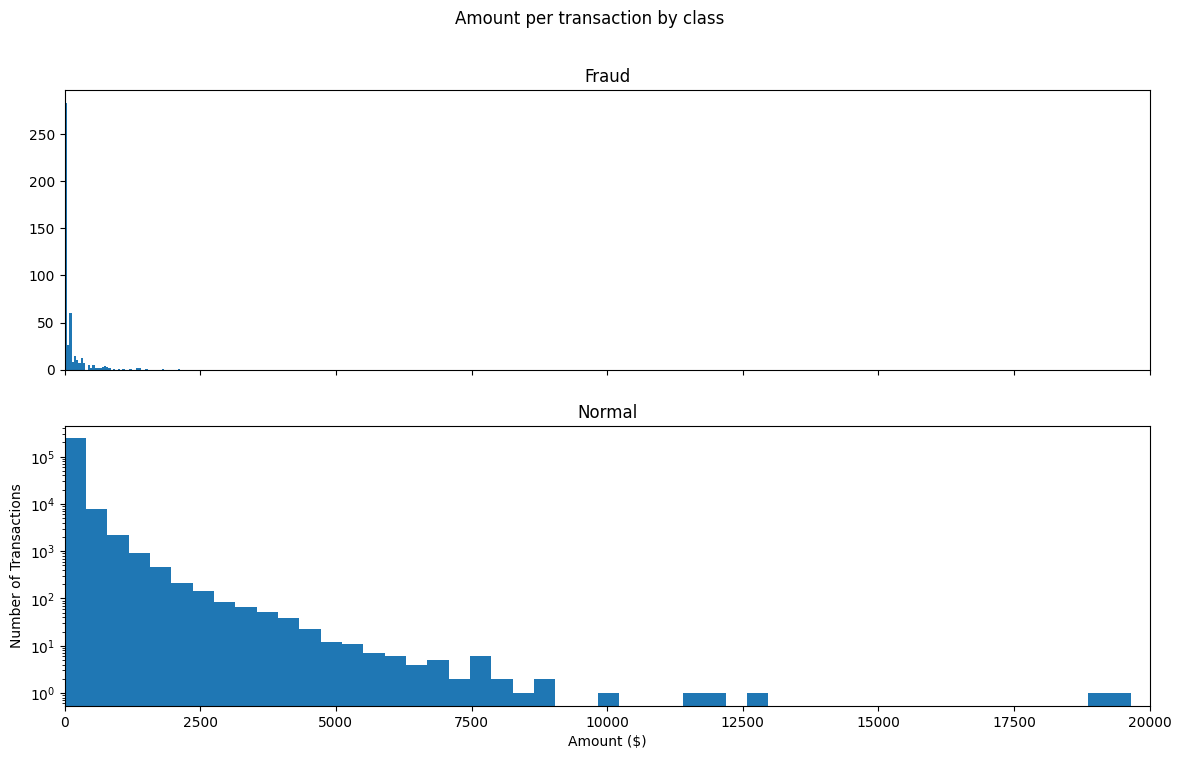

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

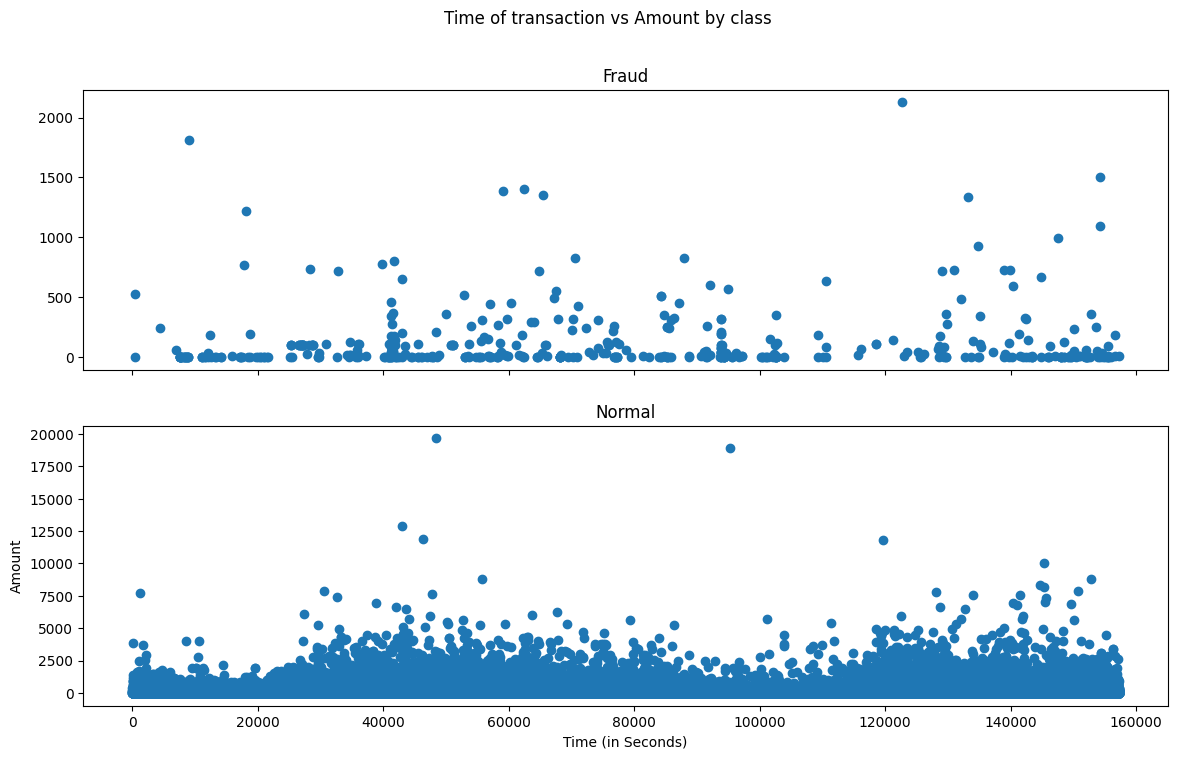

In [32]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [34]:
## Take some sample of the data

data1= df.sample(frac = 0.1,random_state=1)

data1.shape

(25548, 31)

In [35]:
df.shape

(255482, 31)

In [36]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [37]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.001725219573400251
Fraud Cases : 44
Valid Cases : 25504


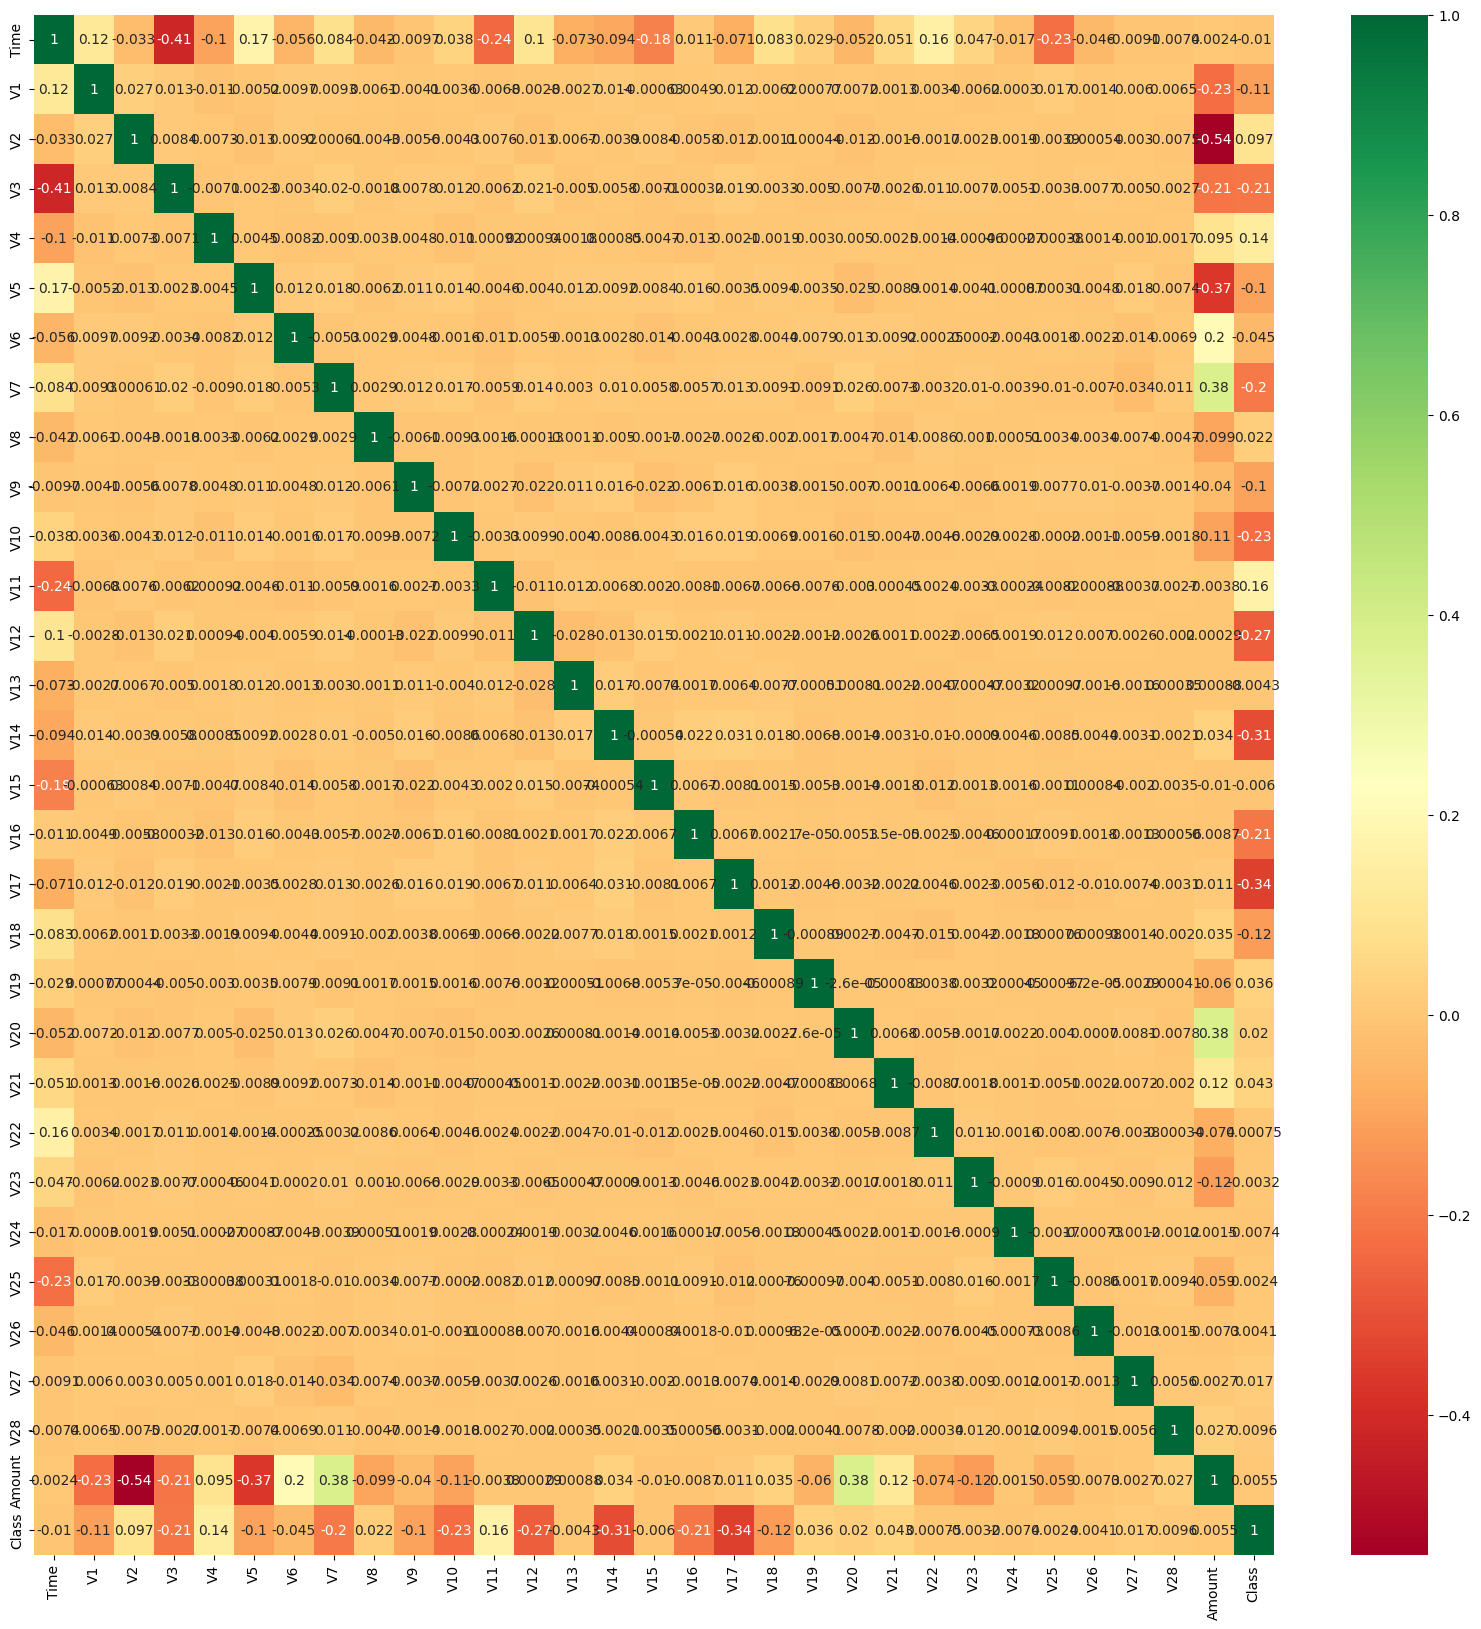

In [39]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [40]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(25548, 30)
(25548,)


### **Model Building**

In [43]:
from sklearn.model_selection import train_test_split

Model 1

In [57]:
from sklearn.linear_model import LogisticRegression
X1=df.drop(['Class'],axis=1)
y1=df['Class']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)
lr=LogisticRegression()


In [73]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [62]:
# Fit the model to the training data
model = lr.fit(X1_train, y_train_encoded)

In [63]:
prediction=model.predict(X1_test)

In [65]:
accuracy_score(y1_test,prediction)

0.997338378237328

### **Model evaluation**

In [66]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
def Plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.show()


In [70]:
from sklearn.metrics import accuracy_score

# Make predictions using your trained model
prediction = model.predict(X_train)

# Calculate accuracy on training data
acc_score = round(accuracy_score(y_train_encoded, prediction) * 100, 2)
print("Accuracy on training data:", acc_score)

Accuracy on training data: 99.9


In [77]:
y_pred = model.predict(X_test)
acc_score = round(accuracy_score(y_pred, y_test)*100,2)
print("Accuracy of our model:", acc_score)






Accuracy of our model: 99.73


In [79]:
from sklearn import metrics
class_report = classification_report(y_pred, y_test)
print('classification report of our model: ', class_report)

classification report of our model:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76482
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00       163

    accuracy                           1.00     76645
   macro avg       0.33      0.33      0.33     76645
weighted avg       1.00      1.00      1.00     76645





##**Conclusion:**

From the classification report, we can see that your model performs well with an accuracy of 0.93. It achieves high precision and recall for both classes (0 and 1), indicating that it's capable of making accurate positive and negative predictions. The F1-score, which combines precision and recall, is also high for both classes, suggesting a good balance between false positives and false negatives.

In summary, your model seems to be performing effectively in distinguishing between the two classes in your dataset. However, keep in mind that the interpretation of these metrics depends on the specific context of your problem, such as the consequences of false positives and false negatives in your application.




